In [29]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [42]:
class layer:
    def __init__(self, in_size, out_size):
#         self.W = tf.Variable(tf.zeros([in_size, out_size]))
        self.W = tf.Variable(tf.random_normal([in_size, out_size], mean=0.0, stddev=0.01))
#         self.b = tf.Variable(tf.zeros([1,out_size]))
#         self.b = tf.Variable(tf.constant(0.1, shape=[1,out_size]))
        self.b = tf.Variable(tf.random_normal([1, out_size], mean=0.0, stddev=0.01))
    
        
    def output(self, inputs, activation_function=None):
        if activation_function == None:
            return tf.matmul(inputs, self.W) + self.b
        else :
            return activation_function(tf.matmul(inputs, self.W) + self.b)

In [43]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
batch_size = 256
g_dim = 128

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [44]:
x_d = tf.placeholder(tf.float32, shape=[None, 784])
x_g = tf.placeholder(tf.float32, shape=[None, 128])

In [45]:
d_l1 = layer(784, g_dim)
d_l2 = layer(g_dim, 1)

g_l1 = layer(g_dim, 256)
g_l2 = layer(256, 784)

var_d = [d_l1.W, d_l1.b, d_l2.W, d_l2.b]
var_g = [g_l1.W, g_l1.b, g_l2.W, g_l2.b]

In [46]:
def discriminator(x):
    h_d1 = d_l1.output(x, tf.nn.relu)
    h_d2 = d_l2.output(h_d1, tf.nn.sigmoid)
    return h_d2

def generator(x):
    h_g1 = g_l1.output(x, tf.nn.relu)
    h_g2 = g_l2.output(h_g1, tf.nn.sigmoid)
    return h_g2

def sample_Z(m,n):
    return np.random.uniform(-1., 1., size=[m,n])

g_sample = generator(x_g)
d_real = discriminator(x_d)
d_fake = discriminator(g_sample)

d_loss = -tf.reduce_mean(tf.log(d_real)+tf.log(1-d_fake))    # d_real, 1-d_fake bigger -> better
g_loss = -tf.reduce_mean(tf.log(d_fake))    # d_fake bigger -> better


In [55]:
d_optimizer = tf.train.AdamOptimizer(0.00003).minimize(d_loss, var_list = var_d)
g_optimizer = tf.train.AdamOptimizer(0.00003).minimize(g_loss, var_list = var_g)

step: 0  d-loss: 1.37994  g-loss: 0.702405
step: 1000  d-loss: 0.522309  g-loss: 2.96665
step: 2000  d-loss: 0.96359  g-loss: 1.3541
step: 3000  d-loss: 0.991985  g-loss: 1.24193
step: 4000  d-loss: 0.979071  g-loss: 1.13577
step: 5000  d-loss: 1.09433  g-loss: 0.905695
step: 6000  d-loss: 1.30563  g-loss: 0.640911
step: 7000  d-loss: 1.25377  g-loss: 0.564495
step: 8000  d-loss: 1.26228  g-loss: 0.547918
step: 9000  d-loss: 1.3177  g-loss: 0.552689
step: 10000  d-loss: 1.28511  g-loss: 0.623009
step: 11000  d-loss: 1.07464  g-loss: 0.824603
step: 12000  d-loss: 0.941013  g-loss: 0.977839
step: 13000  d-loss: 0.970323  g-loss: 1.02105
step: 14000  d-loss: 0.835574  g-loss: 1.142
step: 15000  d-loss: 0.94058  g-loss: 1.08585
step: 16000  d-loss: 0.781637  g-loss: 1.14396
step: 17000  d-loss: 0.812396  g-loss: 1.12312
step: 18000  d-loss: 0.820979  g-loss: 1.14954
step: 19000  d-loss: 1.07443  g-loss: 1.0843
step: 20000  d-loss: 0.968502  g-loss: 1.17991


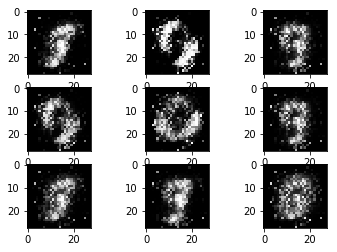

In [56]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for step in range(20001):
    batch_x = mnist.train.next_batch(batch_size)[0]
#     _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    sess.run(d_optimizer, feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
#     _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict={x_g: sample_Z(batch_size, g_dim)})
    sess.run(g_optimizer, feed_dict={x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        d_loss_train, g_loss_train = sess.run([d_loss, g_loss], feed_dict=
                            {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train

zz = sample_Z(batch_size, g_dim)
gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*3+j], cmap='gray')


step: 0  d-loss: 1.00025  g-loss: 1.10962
step: 1000  d-loss: 0.88363  g-loss: 1.17284
step: 2000  d-loss: 0.792074  g-loss: 1.2462
step: 3000  d-loss: 0.988545  g-loss: 1.07126
step: 4000  d-loss: 0.868466  g-loss: 1.16003
step: 5000  d-loss: 0.882058  g-loss: 1.05231
step: 6000  d-loss: 0.914829  g-loss: 1.06049
step: 7000  d-loss: 0.841191  g-loss: 1.212
step: 8000  d-loss: 0.796479  g-loss: 1.30614
step: 9000  d-loss: 0.853633  g-loss: 1.15465
step: 10000  d-loss: 0.836867  g-loss: 1.21891
step: 11000  d-loss: 0.781589  g-loss: 1.29157
step: 12000  d-loss: 0.844492  g-loss: 1.13469
step: 13000  d-loss: 0.826341  g-loss: 1.23906
step: 14000  d-loss: 0.977776  g-loss: 1.16397
step: 15000  d-loss: 0.903497  g-loss: 1.15131
step: 16000  d-loss: 0.901091  g-loss: 1.1118
step: 17000  d-loss: 0.871058  g-loss: 1.15371
step: 18000  d-loss: 0.841184  g-loss: 1.20214
step: 19000  d-loss: 0.790267  g-loss: 1.24049
step: 20000  d-loss: 0.734003  g-loss: 1.31652
step: 21000  d-loss: 0.650191  g

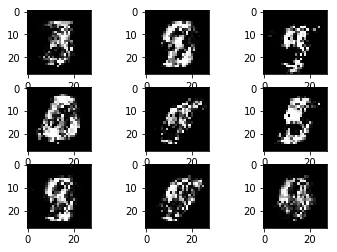

In [57]:
for step in range(50001):
    batch_x = mnist.train.next_batch(batch_size)[0]
#     _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    sess.run(d_optimizer, feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
#     _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict={x_g: sample_Z(batch_size, g_dim)})
    sess.run(g_optimizer, feed_dict={x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        d_loss_train, g_loss_train = sess.run([d_loss, g_loss], feed_dict=
                            {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train
        if d_loss_train<1. and g_loss_train<1. :
            break

zz = sample_Z(batch_size, g_dim)
gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*3+j], cmap='gray')

step: 0  d-loss: 0.58757  g-loss: 1.76931
step: 1000  d-loss: 0.522093  g-loss: 1.92261
step: 2000  d-loss: 0.499806  g-loss: 1.90954
step: 3000  d-loss: 0.517347  g-loss: 1.87499
step: 4000  d-loss: 0.562874  g-loss: 1.90112
step: 5000  d-loss: 0.518282  g-loss: 1.87929
step: 6000  d-loss: 0.590301  g-loss: 1.80154
step: 7000  d-loss: 0.595789  g-loss: 1.71658
step: 8000  d-loss: 0.575677  g-loss: 1.74024
step: 9000  d-loss: 0.532695  g-loss: 1.80966
step: 10000  d-loss: 0.617757  g-loss: 1.69601
step: 11000  d-loss: 0.549402  g-loss: 1.79342
step: 12000  d-loss: 0.616854  g-loss: 1.78625
step: 13000  d-loss: 0.571698  g-loss: 1.86347
step: 14000  d-loss: 0.57975  g-loss: 1.81542
step: 15000  d-loss: 0.567021  g-loss: 1.90713
step: 16000  d-loss: 0.575631  g-loss: 1.77218
step: 17000  d-loss: 0.513963  g-loss: 1.96944
step: 18000  d-loss: 0.586429  g-loss: 1.86989
step: 19000  d-loss: 0.542875  g-loss: 1.92564
step: 20000  d-loss: 0.541094  g-loss: 1.80602
step: 21000  d-loss: 0.54982

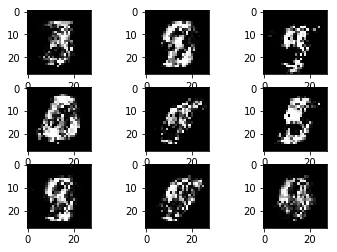

In [58]:
for step in range(50001):
    batch_x = mnist.train.next_batch(batch_size)[0]
#     _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    sess.run(d_optimizer, feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
#     _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict={x_g: sample_Z(batch_size, g_dim)})
    sess.run(g_optimizer, feed_dict={x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        d_loss_train, g_loss_train = sess.run([d_loss, g_loss], feed_dict=
                            {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train
        if d_loss_train<1. and g_loss_train<1. :
            break

# zz = sample_Z(batch_size, g_dim)
gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*3+j], cmap='gray')

step: 0  d-loss: 0.689405  g-loss: 1.76538
step: 1000  d-loss: 0.720091  g-loss: 1.77148
step: 2000  d-loss: 0.63783  g-loss: 1.84894
step: 3000  d-loss: 0.768359  g-loss: 1.69308
step: 4000  d-loss: 0.642236  g-loss: 1.92746
step: 5000  d-loss: 0.700051  g-loss: 1.74665
step: 6000  d-loss: 0.751301  g-loss: 1.9059
step: 7000  d-loss: 0.560945  g-loss: 2.02689
step: 8000  d-loss: 0.68651  g-loss: 1.76775
step: 9000  d-loss: 0.751329  g-loss: 1.77361
step: 10000  d-loss: 0.702232  g-loss: 1.70083
step: 11000  d-loss: 0.714947  g-loss: 1.89112
step: 12000  d-loss: 0.670437  g-loss: 1.80841
step: 13000  d-loss: 0.71338  g-loss: 1.85468
step: 14000  d-loss: 0.713452  g-loss: 1.8182
step: 15000  d-loss: 0.753993  g-loss: 1.7052
step: 16000  d-loss: 0.777876  g-loss: 1.76389
step: 17000  d-loss: 0.654094  g-loss: 1.71913
step: 18000  d-loss: 0.705933  g-loss: 1.7899
step: 19000  d-loss: 0.684919  g-loss: 1.78723
step: 20000  d-loss: 0.725403  g-loss: 1.70332
step: 21000  d-loss: 0.732477  g-

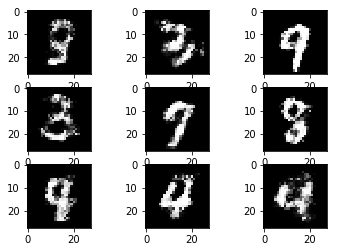

In [60]:
for step in range(50001):
    batch_x = mnist.train.next_batch(batch_size)[0]
#     _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    sess.run(d_optimizer, feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
#     _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict={x_g: sample_Z(batch_size, g_dim)})
    sess.run(g_optimizer, feed_dict={x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        d_loss_train, g_loss_train = sess.run([d_loss, g_loss], feed_dict=
                            {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train
        if d_loss_train<1.5 and g_loss_train<1.5 :
            break

# zz = sample_Z(batch_size, g_dim)
gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*3+j], cmap='gray')

In [61]:
for step in range(50001):
    batch_x = mnist.train.next_batch(batch_size)[0]
#     _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    sess.run(d_optimizer, feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
#     _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict={x_g: sample_Z(batch_size, g_dim)})
    sess.run(g_optimizer, feed_dict={x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        d_loss_train, g_loss_train = sess.run([d_loss, g_loss], feed_dict=
                            {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train
        if d_loss_train<1.5 and g_loss_train<1.5 :
            break

# zz = sample_Z(batch_size, g_dim)
gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*3+j], cmap='gray')

step: 0  d-loss: 0.67844  g-loss: 1.84176
step: 1000  d-loss: 0.735484  g-loss: 1.77122
step: 2000  d-loss: 0.701726  g-loss: 1.8253
step: 3000  d-loss: 0.783137  g-loss: 1.73584
step: 4000  d-loss: 0.725918  g-loss: 1.69626
step: 5000  d-loss: 0.703575  g-loss: 1.78666
step: 6000  d-loss: 0.809319  g-loss: 1.70256
step: 7000  d-loss: 0.768983  g-loss: 1.6007
step: 8000  d-loss: 0.749025  g-loss: 1.82507
step: 9000  d-loss: 0.72166  g-loss: 1.76702
step: 10000  d-loss: 0.844308  g-loss: 1.67886
step: 11000  d-loss: 0.774709  g-loss: 1.74928
step: 12000  d-loss: 0.72114  g-loss: 1.83341
step: 13000  d-loss: 0.758098  g-loss: 1.85115
step: 14000  d-loss: 0.766542  g-loss: 1.78518
step: 15000  d-loss: 0.697457  g-loss: 1.81452
step: 16000  d-loss: 0.754214  g-loss: 1.82327
step: 17000  d-loss: 0.690539  g-loss: 1.77624
step: 18000  d-loss: 0.726351  g-loss: 1.67686
step: 19000  d-loss: 0.700163  g-loss: 1.89845
step: 20000  d-loss: 0.814417  g-loss: 1.6119
step: 21000  d-loss: 0.804299  g

AttributeError: 'MaskedConstant' object has no attribute '_fill_value'